kaggle dataset: https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil?select=amazon.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("amazon.csv",encoding="iso-8859-1")

### 1. Display Top 5 Rows of The Dataset

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### 2. Check Last 5 Rows

In [4]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 6454
Number of columns: 5


### 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


### 5. Check For Duplicate Data and Drop Them

In [7]:
df.duplicated().sum()

32

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

### 6. Check Null Values In The Dataset

In [10]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

### 7. Get Overall Statistics About The Dataframe

In [11]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [12]:
df.describe(include="all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2000-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN


### 8. Rename Month Names To English

In [13]:
df["month"].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [14]:
df["month"] = df["month"].map({
    "Janeiro":"Jan",
    "Fevereiro":"Feb",
    "Março":"Mar",
    "Abril":"Apr",
    "Maio":"May",
    "Junho":"Jun",
    "Julho":"Jul",
    "Agosto":"Aug",
    "Setembro":"Sep",
    "Outubro":"Oct",
    "Novembro":"Nov",
    "Dezembro":"Dec"
})

In [33]:
df["month"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

### 9. Total Number of Fires Registered

In [15]:
df["number"].sum()

698811.073

### 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [16]:
df.groupby("month")["number"].sum().sort_values(ascending=False).index[0]

'Jul'

### 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [17]:
df.groupby("year")["number"].sum().sort_values(ascending=False).index[0]

2003

### 12. In Which State Maximum Number of Forest Fires Was Reported?

In [18]:
df.groupby("state")["number"].sum().sort_values(ascending=False).index[0]

'Mato Grosso'

### 13. Find Total Number of Fires Were Reported In Amazonas

In [19]:
df[df["state"] == "Amazonas"]["number"].sum()

30650.129

### 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [20]:
df[df["state"] == "Amazonas"].groupby("year")["number"].sum()

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

### 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [21]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [22]:
df["date"] = pd.to_datetime(df["date"])

In [23]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [24]:
df["day_name"] = df["date"].dt.day_name()

In [25]:
df.head()

,year,state,month,number,date,day_name
0,1998,Acre,Jan,0.0,1998-01-01,Thursday
1,1999,Acre,Jan,0.0,1999-01-01,Friday
2,2000,Acre,Jan,0.0,2000-01-01,Saturday
3,2001,Acre,Jan,0.0,2001-01-01,Monday
4,2002,Acre,Jan,0.0,2002-01-01,Tuesday


In [26]:
df.groupby("day_name")["number"].sum()

day_name
Friday       106132.499
Monday        62083.025
Saturday      96989.761
Sunday       110528.645
Thursday     138788.604
Tuesday      101906.682
Wednesday     82381.857
Name: number, dtype: float64

### 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [27]:
df[df["year"]==2015].groupby("month")["number"].sum()

month
Apr    2573.000
Aug    4363.125
Dec    4088.522
Feb    2309.000
Jan    4635.000
Jul    4364.392
Jun    3260.552
Mar    2202.000
May    2384.000
Nov    4034.518
Oct    4499.525
Sep    2494.658
Name: number, dtype: float64

C:\Users\saura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

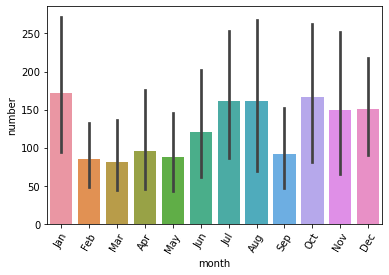

In [28]:
sns.barplot(df[df["year"]==2015]["month"],df[df["year"]==2015]["number"]) 
plt.xticks(rotation=60)

### 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [29]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'day_name'], dtype='object')

In [30]:
data = df.groupby("state")["number"].mean().sort_values(ascending=False)
data

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Sao Paulo'),
  Text(1, 0, 'Mato Grosso'),
  Text(2, 0, 'Bahia'),
  Text(3, 0, 'Piau'),
  Text(4, 0, 'Goias'),
  Text(5, 0, 'Minas Gerais'),
  Text(6, 0, 'Tocantins'),
  Text(7, 0, 'Amazonas'),
  Text(8, 0, 'Ceara'),
  Text(9, 0, 'Paraiba'),
  Text(10, 0, 'Maranhao'),
  Text(11, 0, 'Pará'),
  Text(12, 0, 'Pernambuco'),
  Text(13, 0, 'Roraima'),
  Text(14, 0, 'Santa Catarina'),
  Text(15, 0, 'Amapa'),
  Text(16, 0, 'Rondonia'),
  Text(17, 0, 'Acre'),
  Text(18, 0, 'Rio'),
  Text(19, 0, 'Espirito Santo'),
  Text(20, 0, 'Alagoas'),
  Text(21, 0, 'Distrito Federal'),
  Text(22, 0, 'Sergipe')])

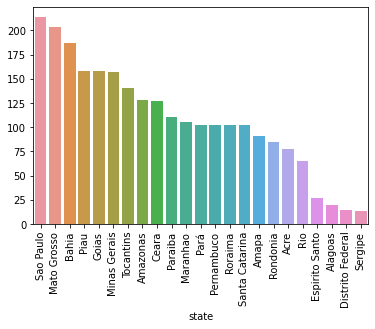

In [31]:
sns.barplot(x=data.index,y=data.values)
plt.xticks(rotation="vertical")

### 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [32]:
df[df["month"] == "Dec"]["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)